<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/ARI(UT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/refs/heads/main/Lockdown%201/DATA/ARI_DATA.csv'
df = pd.read_csv(url)
print(df)

       DAY  N020     NOMEAN      NOMIN      NOMAX  N0220    NO2MEAN  \
0    1-Mar    43  31.732143  14.458333  68.291667     49  51.494048   
1    2-Mar    58  19.226190   9.458333  38.583333     48  43.160714   
2    3-Mar    55  28.142857  10.333333  73.416667     48  46.549603   
3    4-Mar    15  34.416667  11.000000  61.833333     45  52.527778   
4    5-Mar    42  49.215278  13.125000  71.375000     50  53.562500   
..     ...   ...        ...        ...        ...    ...        ...   
87  27-May    14  16.136905   3.500000  38.500000     35  50.023810   
88  28-May    26  14.154762   6.375000  42.708333     45  43.238095   
89  29-May    49   9.180272   4.875000  11.458333     47  37.904762   
90  30-May    27  15.005952   4.625000  36.958333     38  41.857143   
91  31-May    17  19.351190   8.000000  37.250000     35  51.125541   

       NO2MIN     NO2MAX  SO220  ...    SO2MIN    SO2MAX     PM252O  \
0   39.166667  66.666667      0  ...  2.083333  8.000000  23.000000   
1   2

## **$SO_{2}$**

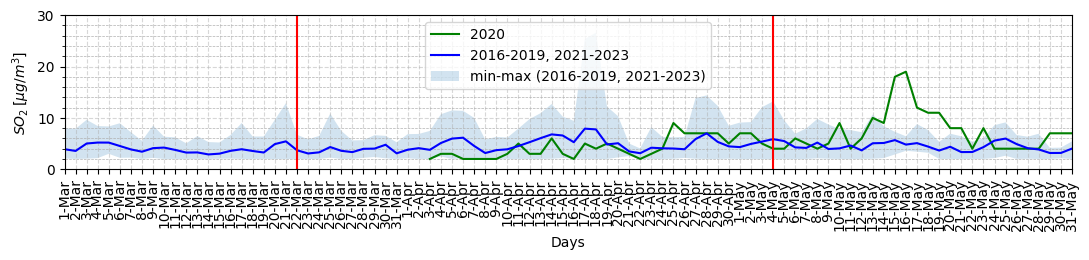

In [26]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$SO_{2} \: [μg/m^{3}$]')

x=[]
for i in df['SO220']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['SO2MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['SO2MIN'], df['SO2MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,30)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

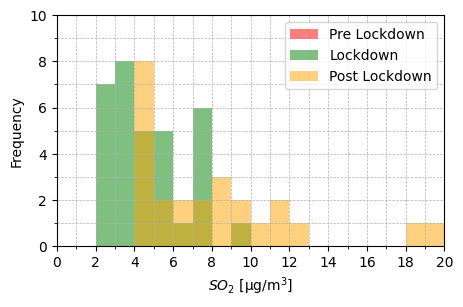

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,3))
bins = np.arange(0, 21, 1)

# Plotting histograms
plt.hist(df['SO220'][0:23][df['SO220'][0:23] > 0], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['SO220'][23:66][df['SO220'][23:66] > 0], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['SO220'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$SO_{2}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,20)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 22, 2))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [28]:
mean_SO2MEAN = df['SO2MEAN'][23:66].dropna().mean()
mean_SO220 = df['SO220'][23:66].dropna().mean()

if pd.notna(mean_SO2MEAN) and pd.notna(mean_SO220):
    percentage_change = ((mean_SO220 - mean_SO2MEAN) / mean_SO2MEAN) * 100
else:
    percentage_change = float('nan')

# Print the results
print(f"Mean of SO2MEAN (23-66): {mean_SO2MEAN}")
print(f"Mean of 2020 (23-66): {mean_SO220}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean of SO2MEAN (23-66): 4.789255736581397
Mean of 2020 (23-66): 3.255813953488372
Percentage Change: -32.02%


In [29]:
PRE  = df['SO220'][0:23].dropna().mean()
LOCK = df['SO220'][23:66].dropna().mean()
POST = df['SO220'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 0.0
LOCK: 3.255813953488372
POST: 7.64


In [30]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: inf%
LOCK to POST: 134.66%


<ipython-input-30-4509faa92574>:2: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100


In [31]:
# Calculate percentage difference from PRE to LOCK
if PRE == 0:
    percentage_diff_pre_lock = float('inf')
else:
    percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# Calculate percentage difference from LOCK to POST
if LOCK == 0:
    percentage_diff_lock_post = float('inf')
else:
    percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

# Print the results
print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: inf%
LOCK to POST: 134.66%


## **NO**

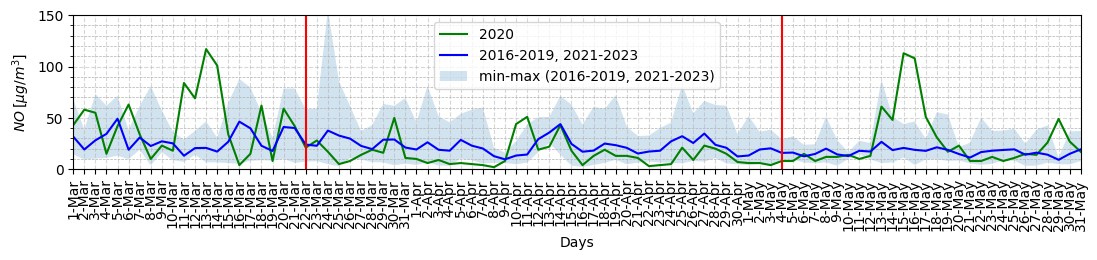

In [32]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['N020'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019, 2021-2023)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

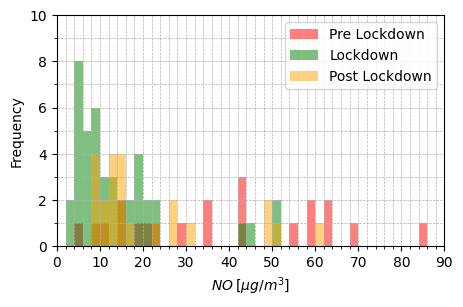

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 102, 2)

plt.hist(df['N020'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['N020'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['N020'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(1,90)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 100, 10))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


In [34]:
mean_NOMEAN = df['NOMEAN'][23:66].dropna().mean()
mean_NO20 = df['N020'][23:66].dropna().mean()

if pd.notna(mean_NOMEAN) and pd.notna(mean_NO20):
    percentage_change = ((mean_NO20 - mean_NOMEAN) / mean_NOMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NOMEAN }")
print(f"Mean of 2020 (23-66): {mean_NO20}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 22.692030470813954
Mean of 2020 (23-66): 14.046511627906977
Percentage Change: -38.10%


In [35]:
PRE  = df['N020'][0:23].dropna().mean()
LOCK = df['N020'][23:66].dropna().mean()
POST = df['N020'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 43.69565217391305
LOCK: 14.046511627906977
POST: 28.56


In [36]:
# Calculate percentage difference from PRE to LOCK
if PRE == 0:
    percentage_diff_pre_lock = float('inf')
else:
    percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# Calculate percentage difference from LOCK to POST
if LOCK == 0:
    percentage_diff_lock_post = float('inf')
else:
    percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

# Print the results
print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -67.85%
LOCK to POST: 103.32%


## **$NO_{2}$**

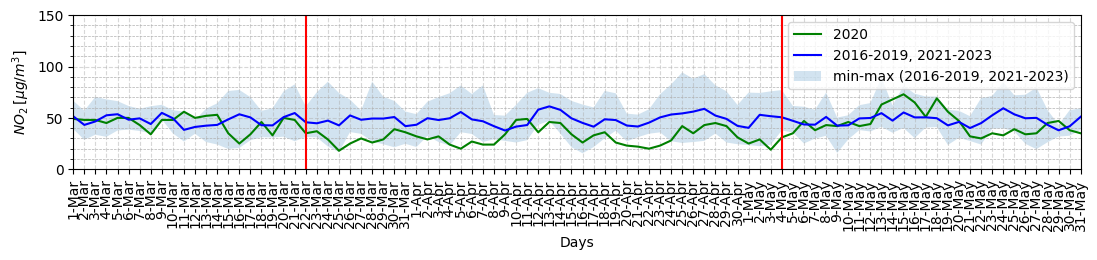

In [37]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['N0220'], 'g', label='2020')
plt.plot(df['DAY'], df['NO2MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

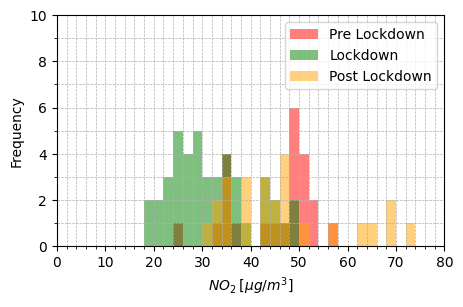

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 80, 2)

plt.hist(df['N0220'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['N0220'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['N0220'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO_{2} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(1,80)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 90, 10))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [40]:
mean_NO2MEAN = df['NO2MEAN'][23:66].dropna().mean()
mean_NO220 = df['N0220'][23:66].dropna().mean()

if pd.notna(mean_NO2MEAN) and pd.notna(mean_NO220):
    percentage_change = ((mean_NO220 - mean_NO2MEAN) / mean_NO2MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NO2MEAN }")
print(f"Mean of 2020 (23-66): {mean_NO220}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 48.517769286744176
Mean of 2020 (23-66): 31.3953488372093
Percentage Change: -35.29%


In [41]:
PRE  = df['N0220'][0:23].dropna().mean()
LOCK = df['N0220'][23:66].dropna().mean()
POST = df['N0220'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 44.21739130434783
LOCK: 31.3953488372093
POST: 46.48


In [42]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -29.00%
LOCK to POST: 48.05%


## **$PM_{2.5}$**

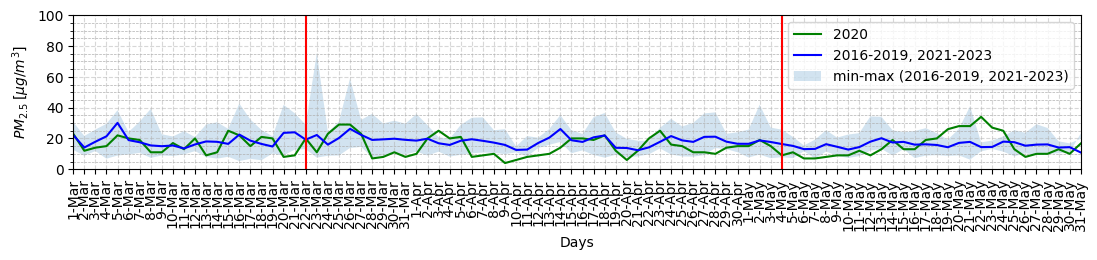

In [51]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$PM_{2.5} \: [μg/m^{3}$]')


plt.plot(df['DAY'], df['PM252O'], 'g', label='2020')
plt.plot(df['DAY'], df['PM25MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'],df['PM25MIN'], df['PM25MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

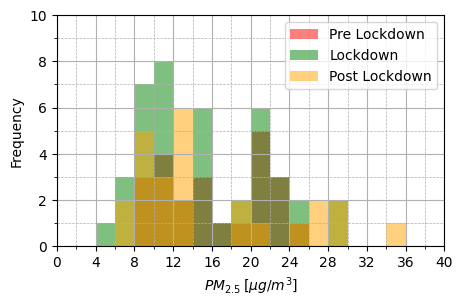

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 42, 2)

plt.hist(df['PM252O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['PM252O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['PM252O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$PM_{2.5} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,40)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 44, 4))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [53]:
mean_PM25MEAN = df['PM25MEAN'][23:66].dropna().mean()
mean_PM2520 = df['PM252O'][23:66].dropna().mean()

if pd.notna(mean_PM25MEAN) and pd.notna(mean_PM2520):
    percentage_change = ((mean_PM2520 - mean_PM25MEAN) / mean_PM25MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_PM25MEAN}")
print(f"Mean of 2020 (23-66): {mean_PM2520}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 18.178339984418606
Mean of 2020 (23-66): 14.627906976744185
Percentage Change: -19.53%


In [54]:
PRE  = df['PM252O'][0:23].dropna().mean()
LOCK = df['PM252O'][23:66].dropna().mean()
POST = df['PM252O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE}")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 16.0
LOCK: 14.627906976744185
POST: 15.6


In [55]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -8.58%
LOCK to POST: 6.65%


## **$PM_{10}$**

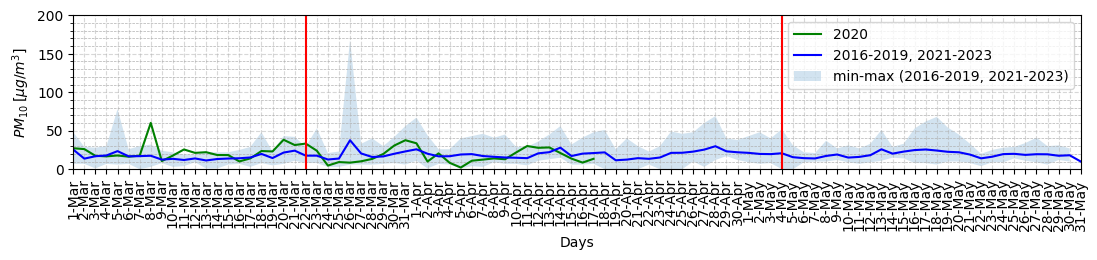

In [56]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$PM_{10} \: [μg/m^{3}$]')

x=[]
for i in df['PM1020']:
  if i==0:
    x+=[None]
  else:
    x+=[i]


plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['PM10MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'],df['PM10MIN'], df['PM10MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,200)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

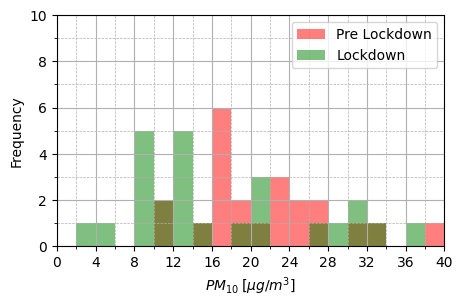

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pre_lockdown_data = df['PM1020'][0:23][df['PM1020'][0:23] != 0]
lockdown_data = df['PM1020'][23:66][df['PM1020'][23:66] != 0]

plt.figure(figsize=(5, 3))
bins = np.arange(0, 42, 2)

plt.hist(pre_lockdown_data, bins=bins, alpha=0.5, label='Pre Lockdown', color='red')
plt.hist(lockdown_data, bins=bins, alpha=0.5, label='Lockdown', color='green')

plt.xlabel('$PM_{10} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0, 40)
plt.ylim(0, 10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 44, 4))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [59]:
mean_PM10MEAN = df['PM10MEAN'][23:66].dropna().mean()
mean_PM1020 = df['PM1020'][23:66].dropna().mean()

if pd.notna(mean_PM10MEAN) and pd.notna(mean_PM1020):
    percentage_change = ((mean_PM1020 - mean_PM10MEAN) / mean_PM10MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_PM10MEAN}")
print(f"Mean of 2020 (23-66): {mean_PM1020}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 19.488372093023255
Mean of 2020 (23-66): 9.877784417372093
Percentage Change: -49.31%


In [60]:
PRE  = df['PM1020'][0:23].dropna().mean()
LOCK = df['PM1020'][23:66].dropna().mean()
POST = df['PM1020'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 23.106884057826086
LOCK: 9.877784417372093
POST: 0.0


In [61]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -57.25%
LOCK to POST: -100.00%
